## Veri Seti Hikaye ve Yapısı

In [1]:
import seaborn as sns
planets = sns.load_dataset("planets")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [2]:
df = planets.copy()

In [3]:
df.info() #veriseti yapısal bilgileri

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
method            1035 non-null object
number            1035 non-null int64
orbital_period    992 non-null float64
mass              513 non-null float64
distance          808 non-null float64
year              1035 non-null int64
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [4]:
df.dtypes #sadece değişkenler ve değişkenlerin ne olduğuna ulaşmak için

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

In [5]:
#object değişkenleri categoricala çevirmek faydalı olacaktır
import pandas as pd
df["method"] = pd.Categorical(df["method"])
df.dtypes

method            category
number               int64
orbital_period     float64
mass               float64
distance           float64
year                 int64
dtype: object

## Veri Seti Betimlenmesi

In [6]:
df.shape

(1035, 6)

In [7]:
df.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [8]:
df.describe().T #eksik gözlemleri göz ardı eder ve categorical değişkenlere bakmaz

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


## Eksik değerlerin belirlenmesi

In [9]:
#eksik gözlem var mı?
df.isnull().values.any()

True

In [10]:
#hangi değişkende kaç tane eksik var?
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [21]:
#eksik değerleri 0 ile doldurmak
df["orbital_period"] = df["orbital_period"].fillna(0)
#df["orbital_period"].fillna(0, inplace = True)

In [23]:
#eksik değerleri ortalamaları ile doldurmak
df["mass"] = df["mass"].fillna(df["mass"].mean())

In [26]:
#tüm eksik değerleri kendi ortalamaları ile doldurmak
df = df.fillna(df.mean())

In [28]:
#şimdilik orijinal datasetimizi alalım. Daha sonra ayrıntılı görcez bu konuları.
df = planets.copy()
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

## Kategorik Değişken Özellikleri

In [30]:
#sadece kategorik değişkenleri almak
kat_df = df.select_dtypes(include = ["object"])
kat_df.head()

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity


In [31]:
#kategorik değişkenlerin sınıflarına erişmek
kat_df["method"].unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [33]:
#kategorik değişkenlerin sınıf sayısına erişmek
kat_df["method"].value_counts().count()

10

In [34]:
#her bir ayrı sınıfın sayısına erişmek
kat_df["method"].value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

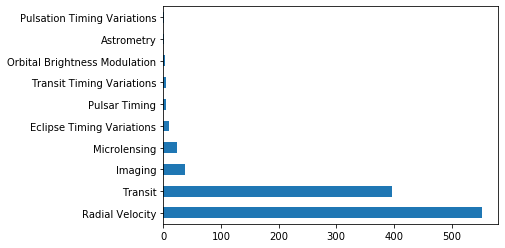

In [35]:
#ayrı sınıfların sayısını bir bar grafikte göstermek
df["method"].value_counts().plot.barh();

## Sürekli Değişken Özellikleri

In [36]:
df_num = df.select_dtypes(include = ["float64","int64"])
df_num.head()

,number,orbital_period,mass,distance,year
0,1,269.300,7.10,77.40,2006
1,1,874.774,2.21,56.95,2008
2,1,763.000,2.60,19.84,2011
3,1,326.030,19.40,110.62,2007
4,1,516.220,10.50,119.47,2009


In [37]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [41]:
df_num["mass"].describe()

count    513.000000
mean       2.638161
std        3.818617
min        0.003600
25%        0.229000
50%        1.260000
75%        3.040000
max       25.000000
Name: mass, dtype: float64

# Dağılım Grafikleri

### Veri Seti Hikayesi

price: dolar cinsinde fiyat ( 326– 18,823)

carat: ağırlık (0.2–5.01)

cut: kalite (Fair, Good, Very Good, Premium, Ideal)

color: renk (from J (worst) to D (best))

clarity: temizliği, berraklığı (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x: length in mm (0–10.74)

y: width in mm (0–58.9)

z: depth in mm (0–31.8)

depth: toplam derinlik yüzdesi = z / mean(x, y) = 2 * z / (x + y) (43–79)

table: elmasın en geniş noktasına göre genişliği (43–95)

In [2]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [45]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [47]:
df["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [48]:
df["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [3]:
#ordinal sıralama için fonksiyon import edelim
from pandas.api.types import CategoricalDtype

In [50]:
df["cut"].head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: object

In [52]:
#kategorileri elimizle sıralayalım. Sonra fonksiyona koyalım.
cut_kategoriler = ["Fair","Good","Very Good","Premium","Ideal"]
df["cut"] = df["cut"].astype(CategoricalDtype(categories = cut_kategoriler, ordered = True))

In [53]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): [Fair < Good < Very Good < Premium < Ideal]

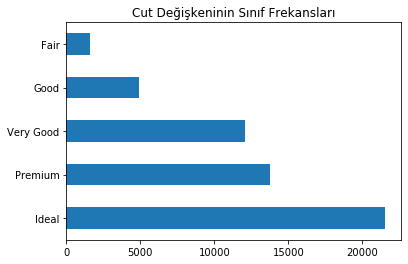

In [54]:
#barplot çizdirelim
df["cut"].value_counts().plot.barh().set_title("Cut Değişkeninin Sınıf Frekansları");

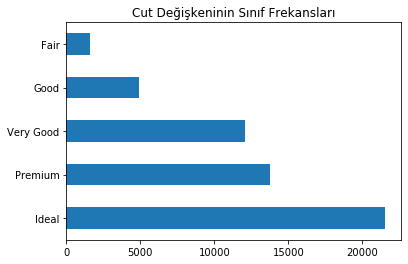

In [56]:
#daha iyi bir yazım olması için alt alta parantez içine alarak yazabiliriz.
(df["cut"]
 .value_counts()
 .plot.barh()
 .set_title("Cut Değişkeninin Sınıf Frekansları"));

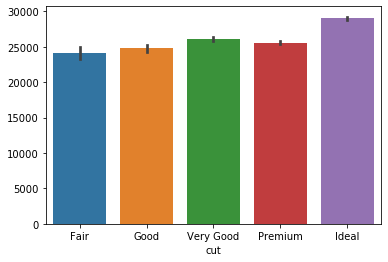

In [61]:
sns.barplot(x = "cut", y = df["cut"].index, data= df);

## Çaprazlamalar

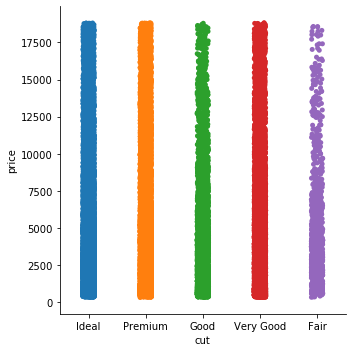

In [5]:
sns.catplot(x = "cut", y = "price", data = df);

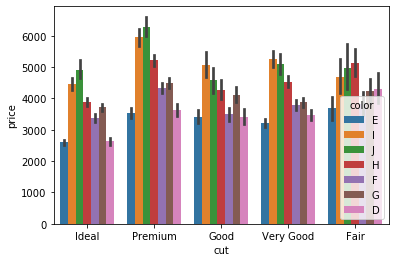

In [6]:
#verimizi daha iyi görmek için bir boyut daha ekliyoruz
sns.barplot(x = "cut", y = "price", hue = "color", data = df);

Fiyatların iki grafikte farklı olma sebebi 2.grafikte price değerini üstteki gibi göstermek mümkün olmadığından dolayı her renk sınıfının ortalamasını alarak göstermiştir. Bu işlemi groupby ile yapalım.

In [8]:
df.groupby(["cut","color"])["price"].mean()

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Ideal      D        2629.094566
           E        2597.550090
           F        3374.939362
           G        3720.706388
           H        3889.334831
           I        4451.970377
           J        4918.186384
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Very Good  D        3470.467284
           E        3214.652083
           F        377

## Histogram ve Yoğunluk

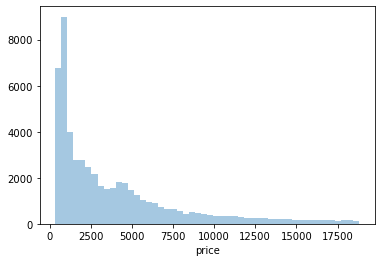

In [11]:
sns.distplot(df["price"], kde = False);

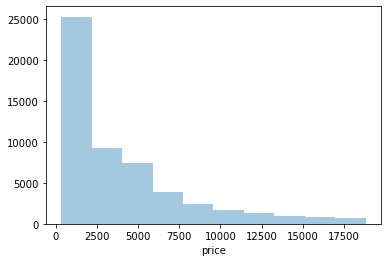

In [12]:
sns.distplot(df["price"],bins = 10, kde = False); #kutu aralıklarını ayarlayabiliyoruz.

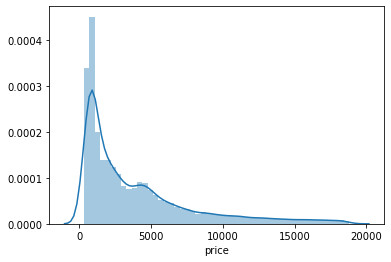

In [13]:
sns.distplot(df["price"]); #olasılık yoğunluk fonksiyonuna göre bir grafik çıkardı.

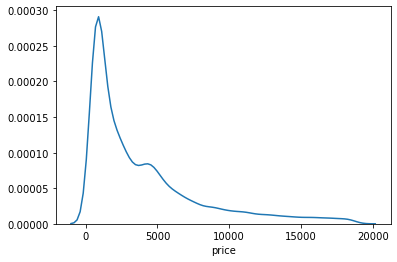

In [15]:
sns.distplot(df["price"], hist = False);

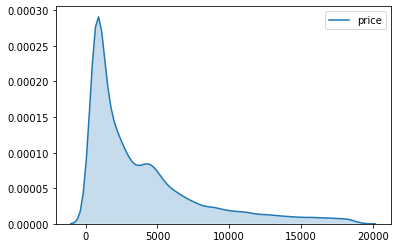

In [16]:
sns.kdeplot(df.price, shade = True); #sürekli değişkenin yoğunlaşlamasıyla ilgili grafik

## Histogram ve Çaprazlamalar

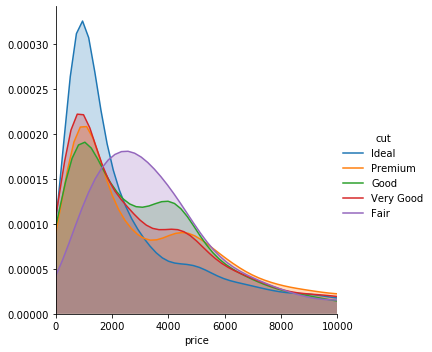

In [18]:
#Facetgrid: grafik üzerine eklenen boyutları bölerek gösterir.
(sns.FacetGrid(df,
              hue = "cut",
              height = 5,
              xlim = (0,10000))
.map(sns.kdeplot, "price", shade = True)
.add_legend()
);

Aslında  ideal sınıfının düşük pricelerda çok toplanması beklemeyiz ama böyle bir grafik çizdirince durumun böyle olduğunu fark ediyoruz. Fiyat yükseldikçe her sınıf yaklaşık olarak aynı yere toplanıyor diyebiliriz.

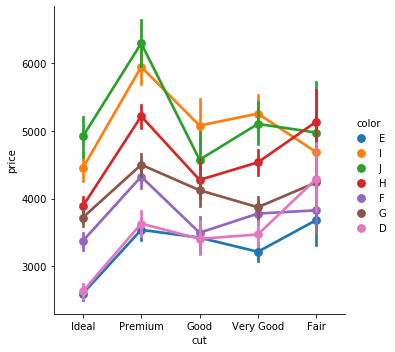

In [19]:
sns.catplot(x = "cut", y = "price", hue = "color", kind = "point", data = df);

## Veri Seti Hikayesi

total_bill: yemeğin toplam fiyatı (bahşiş ve vergi dahil)

tip: bahşiş

sex: ücreti ödeyen kişinin cinsiyeti (0=male, 1=female)

smoker: grupta sigara içen var mı? (0=No, 1=Yes)

day: gün (3=Thur, 4=Fri, 5=Sat, 6=Sun)

time: ne zaman? (0=Day, 1=Night)

size: grupta kaç kişi var?

In [20]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [22]:
df["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [23]:
df["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [24]:
df["size"].value_counts()

2    156
3     38
4     37
5      5
6      4
1      4
Name: size, dtype: int64

In [25]:
df["time"].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

## Boxplot

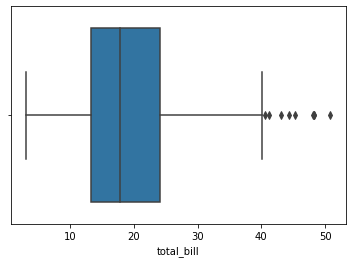

In [26]:
sns.boxplot(x = df["total_bill"]);

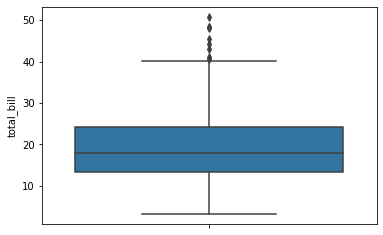

In [27]:
sns.boxplot(x = df["total_bill"], orient = "v"); #dikey

## Boxplot Çaprazlamalar

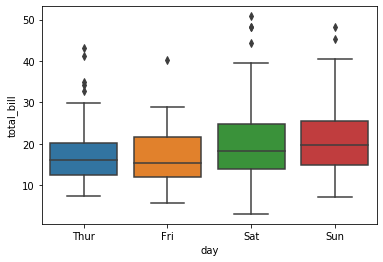

In [29]:
#Hangi günler daha fazla kazanıyoruz?
sns.boxplot(x = "day", y = "total_bill", data = df);

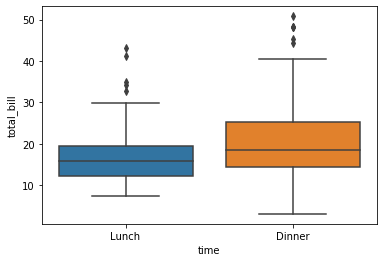

In [30]:
#Günün hangi zamanı daha fazla kazanıyoruz?
sns.boxplot(x = "time", y = "total_bill", data = df);

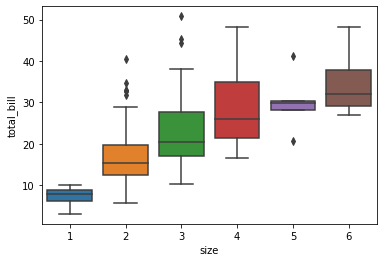

In [31]:
#Kişi sayısı ve kazanç
sns.boxplot(x = "size", y = "total_bill", data = df);

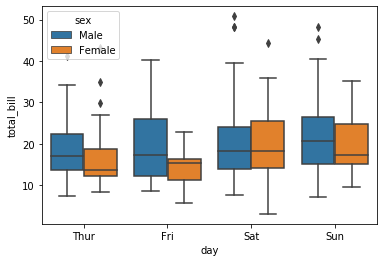

In [33]:
#Ekstra bir boyut olarak cinsiyeti ekleyelim
sns.boxplot(x = "day", y = "total_bill", hue = "sex", data = df);

Ortadaki çizgi medyanı gösterir. Ona bakarak karşılaştırma yapabiliriz.

## Violin Grafik

Bize daha çok dağılım anlamında bilgi sunar.

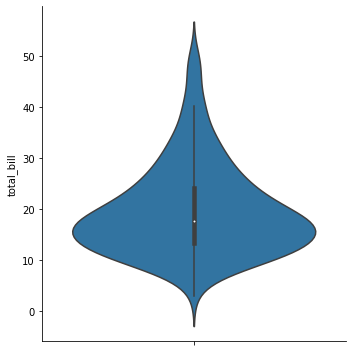

In [34]:
sns.catplot(y = "total_bill", kind = "violin", data = df);

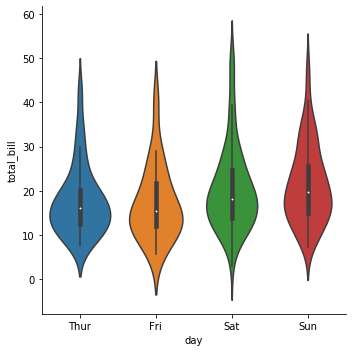

In [35]:
sns.catplot(x= "day", y = "total_bill", kind = "violin", data = df);

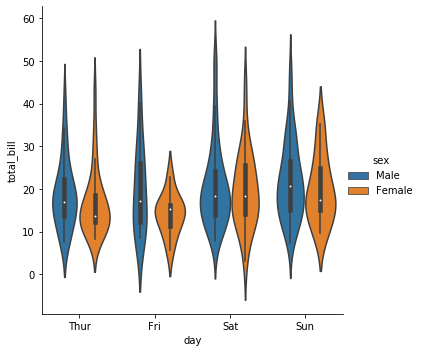

In [36]:
sns.catplot(x= "day", y = "total_bill", hue = "sex",kind = "violin", data = df);

# Korelasyon Grafikleri

## Scatterplot

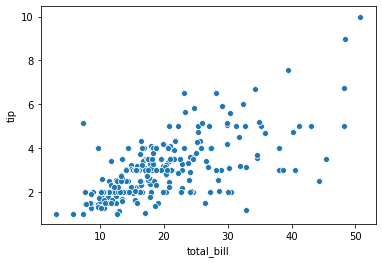

In [38]:
sns.scatterplot(x = "total_bill", y = "tip", data = df);

## Korelasyon Çaprazlamalar

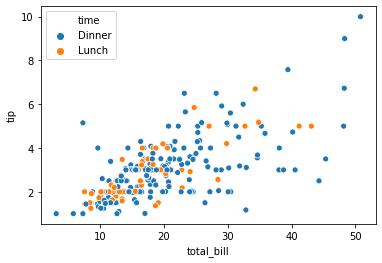

In [40]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "time", data = df);

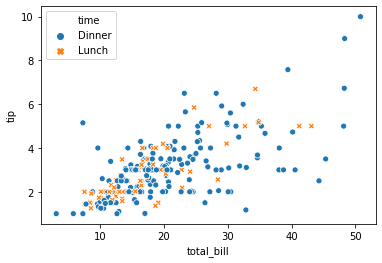

In [41]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "time", style = "time", data = df);

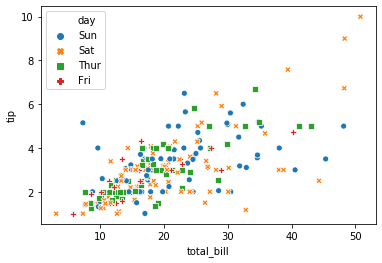

In [42]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "day", style = "day", data = df);

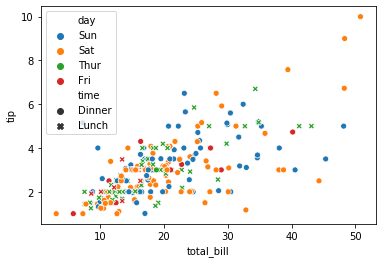

In [44]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "day", style = "time", data = df);

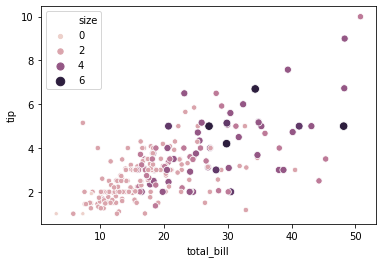

In [43]:
sns.scatterplot(x = "total_bill", y = "tip", hue= "size", size = "size", data = df);

## Doğrusal İlişkinin Gösterilmesi

In [45]:
import matplotlib.pyplot as plt

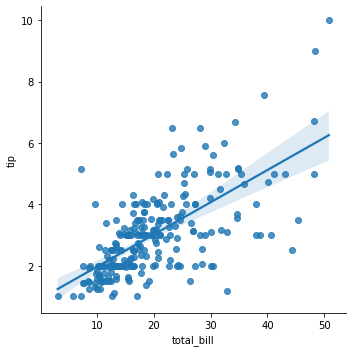

In [47]:
sns.lmplot(x = "total_bill", y = "tip", data = df);

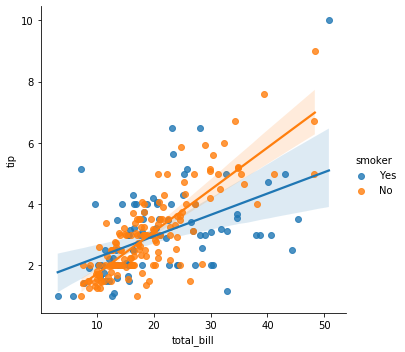

In [50]:
sns.lmplot(x = "total_bill", y = "tip", hue = "smoker" ,data = df);

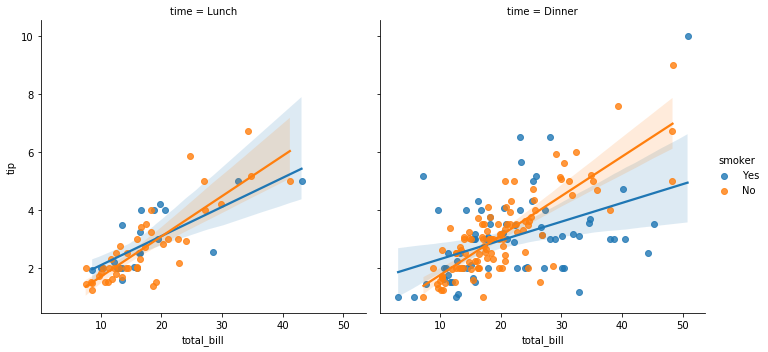

In [51]:
sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", col = "time", data = df);

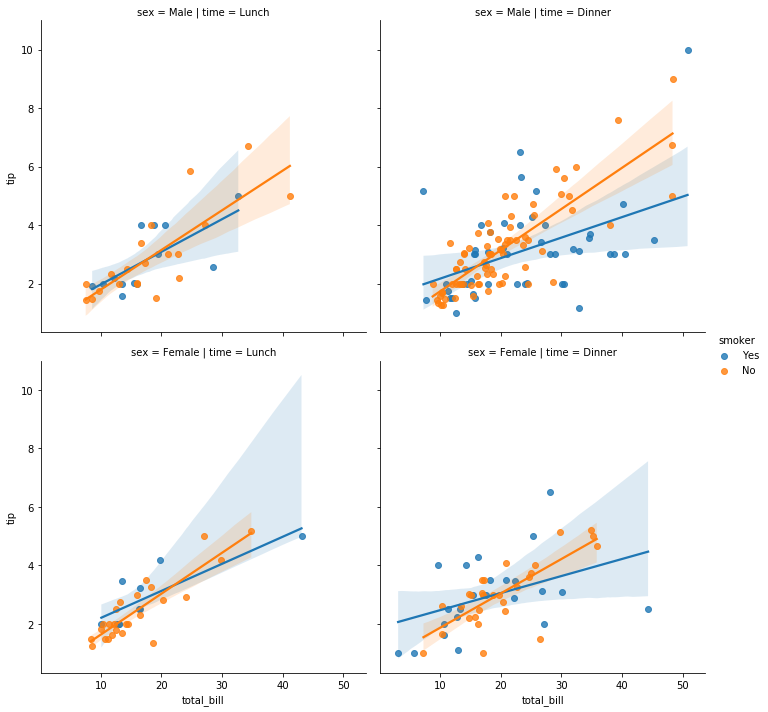

In [53]:
sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", col = "time", row = "sex", data = df);

## Scatterplot Matrisi

In [54]:
import seaborn as sns; 
iris = sns.load_dataset("iris")
df = iris.copy()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [55]:
df.shape

(150, 5)

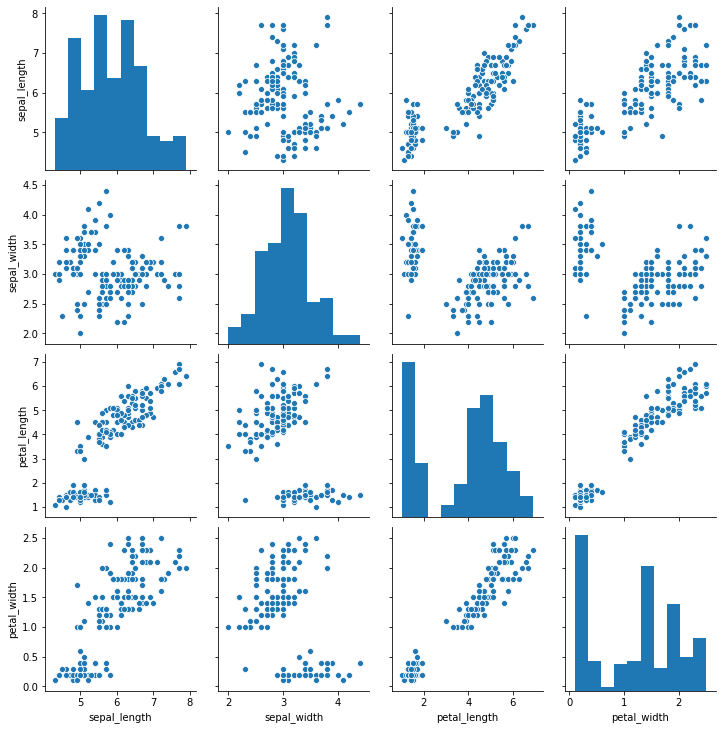

In [56]:
sns.pairplot(df);

*Eksende yer alan grafikler değişkenlerin dağılımlarını ifade eder.

*Scatterplot grafiklerinde eğer oluşturulmuş olan grafik bir toz bulutu şeklindeyse veya yapısal formu yoksa bu iki değişken arası ilişki yoktur.

*scatterplotlarda eğer kümelenmeler farklı köşelerdeyse çaprazlama durumuyla gözlemleyebiliriz.

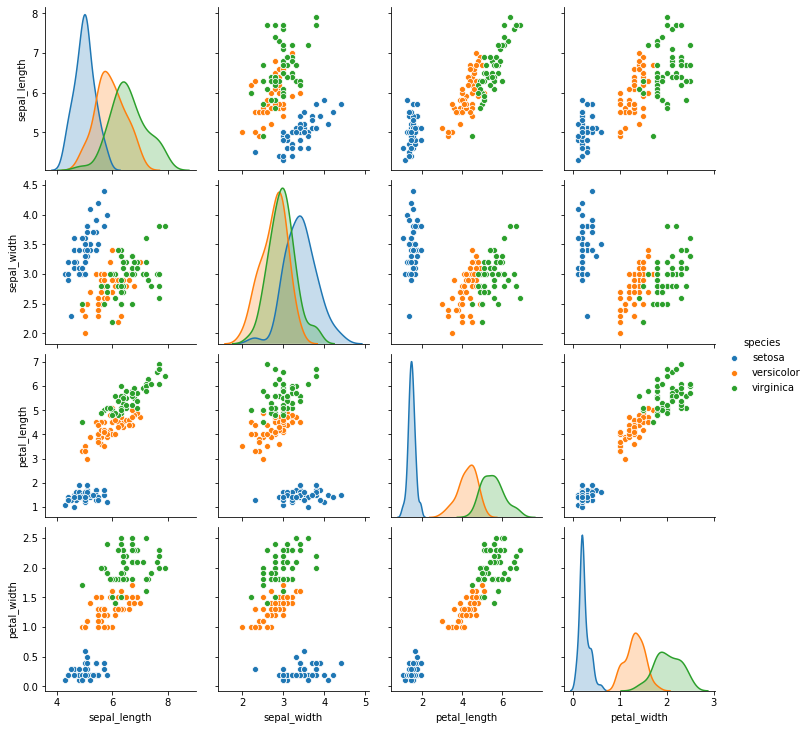

In [57]:
sns.pairplot(df, hue = "species");

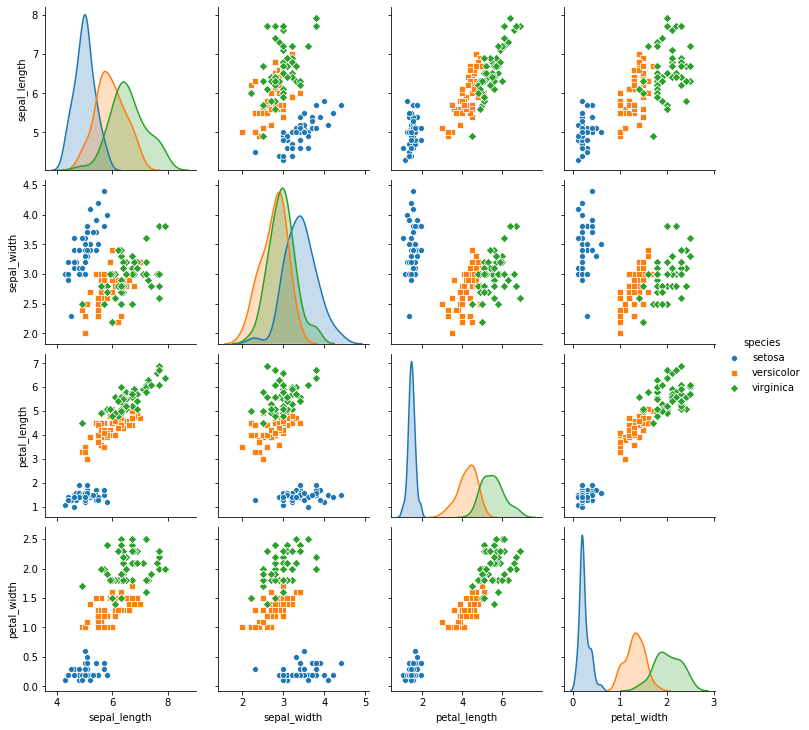

In [58]:
sns.pairplot(df, hue = "species", markers = ["o","s","D"]);

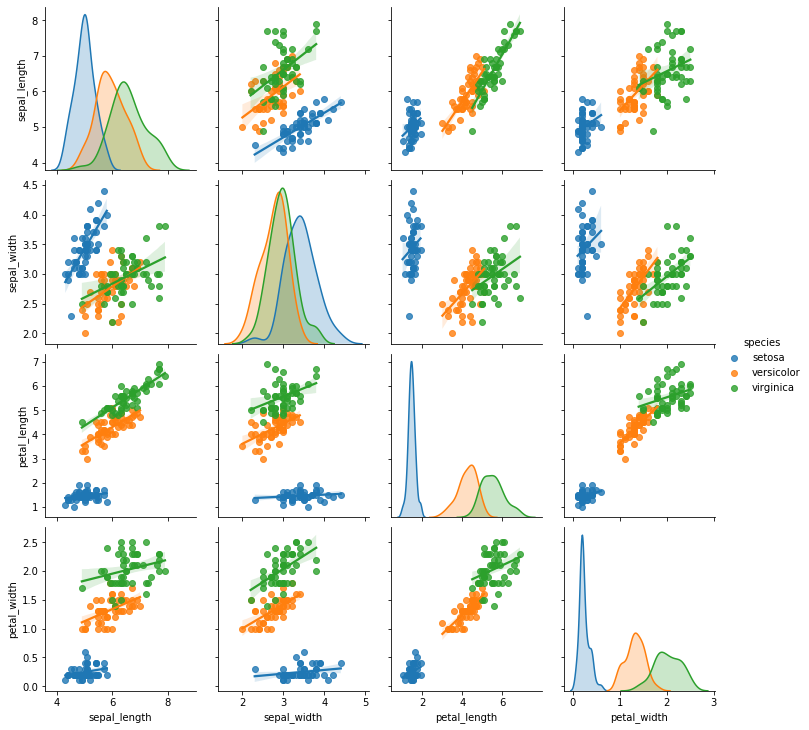

In [59]:
sns.pairplot(df, kind = "reg", hue = "species");

## Heatmap - Isı Haritası

### Veri Seti Hikayesi

In [60]:
import seaborn as sns
flights = sns.load_dataset('flights')
df = flights.copy()
df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [61]:
df.shape

(144, 3)

In [62]:
df["passengers"].describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: passengers, dtype: float64

In [64]:
df = df.pivot("month","year","passengers")

In [65]:
df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


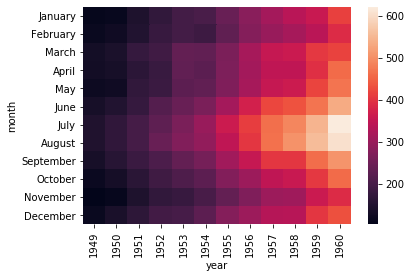

In [66]:
sns.heatmap(df);

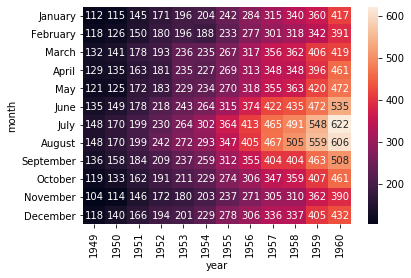

In [67]:
sns.heatmap(df, annot = True, fmt = "d");

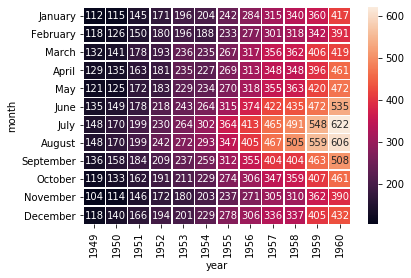

In [68]:
sns.heatmap(df, annot = True, fmt = "d", linewidths = .5);

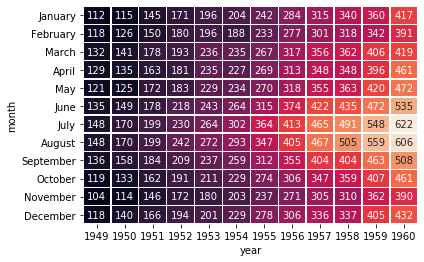

In [70]:
sns.heatmap(df, annot = True, fmt = "d", linewidths = .5, cbar = False);  #yandaki grafiği kaldırmassan daha iyi olur

## Çizgi Grafik

### Veri Seti Hikayesi

In [71]:
import seaborn as sns
fmri = sns.load_dataset("fmri")
df = fmri.copy()
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
